# MSDS-432: Module 2 - Implement a Selection Sort Algorithm  
Jason Adam  

## Imports

In [39]:
import functools
import random
import string
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [40]:
class TimeFunc:
    """Decorator to return run time of function in seconds."""
    def __init__(self, func):
        functools.update_wrapper(self, func)
        self.func = func
        self.func_time = 0
        
    def __call__(self, *args, **kwargs):
        start_time = time.perf_counter()
        result = self.func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        self.func_time = run_time
        return result

## 1 - Generate Random Arrays  
Please set up five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  Ensure that a common random number seed is used to generate each of the arrays. 

### Extra Credit  
Do the same thing for each of the following four data types:  (1) uniformly distributed random integer, (2) uniformly distributed random float, (3) randomly generated text string of length 5, and (4) randomly generated text string of length 15.

In [83]:
def create_random_lists() -> dict:
    """Generate a dictionary containing lists for experiment.
    
    Returns
    -------
    dict:
        Dictionary of lists varying in size and data type.
    
    """
    lengths: list = [5000, 10000, 15000, 20000, 25000]

    rand_lists: dict = {
        "int_l": [],
        "float_l": [],
        "str_5_l": [],
        "str_15_l": [],
    }

    for i in lengths:
        random.seed(432)
        rand_lists["int_l"].append(np.random.randint(1, 30001, i).tolist())
        random.seed(432)
        rand_lists["float_l"].append(np.random.uniform(0, 30001, i).tolist())
        random.seed(432)
        rand_lists["str_5_l"].append(
            ["".join(random.choices(string.ascii_letters, k=5)) for _ in range(i)]
        )
        random.seed(432)
        rand_lists["str_15_l"].append(
            ["".join(random.choices(string.ascii_letters, k=15)) for _ in range(i)]
        )
        
    return rand_lists
    

rand_lists = create_random_lists()

In [84]:
# Verify lists were generated correctly
for k, v in rand_lists.items():
    for i in v:
        print(f"Data type = {k} and length = {len(i)}")

Data type = int_l and length = 5000
Data type = int_l and length = 10000
Data type = int_l and length = 15000
Data type = int_l and length = 20000
Data type = int_l and length = 25000
Data type = float_l and length = 5000
Data type = float_l and length = 10000
Data type = float_l and length = 15000
Data type = float_l and length = 20000
Data type = float_l and length = 25000
Data type = str_5_l and length = 5000
Data type = str_5_l and length = 10000
Data type = str_5_l and length = 15000
Data type = str_5_l and length = 20000
Data type = str_5_l and length = 25000
Data type = str_15_l and length = 5000
Data type = str_15_l and length = 10000
Data type = str_15_l and length = 15000
Data type = str_15_l and length = 20000
Data type = str_15_l and length = 25000


## 2 - Execute Selection Sort  
Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the execution time with each execution. Use one of the timing methods we learned in class.

In [85]:
# Helper Function to be used in SS algo
def find_smallest(l: list) -> int:
    """Find the smallest value in a list.
    
    Parameters
    ----------
    l: list
        List of values.
    
    Returns
    -------
    int
        Index location of smallest value.
    """
    smallest = l[0]
    smallest_idx = 0
    for i in range(1, len(l)):
        if l[i] < smallest:
            smallest = l[i]
            smallest_idx = i
    return smallest_idx


# Selection Sort Algorithm
@TimeFunc
def selection_sort(l: list) -> list:
    """Sort list with Selection Sort Algorithm.
    
    Parameters
    ----------
    l: list
        List of values to be sorted.
        
    Returns
    -------
    list
        Sorted list.
    """
    sorted_array: list = []
    for i in range(len(l)):
        smallest: int = find_smallest(l)
        sorted_array.append(l.pop(smallest))
    return sorted_array

## 3 - Create Comparison Table  
Organize the results of the study into a table showing the size of data array and the time taken to sort the array. Discuss the differences in timing and how they relate to data type and length of array.

In [86]:
def create_compare_df() -> pd.DataFrame:
    """Generate comparison dataframe for lists.
    
    Returns
    -------
    pd.DataFrame
        Pandas data frame containing time metrics for
        selection sort algorithm.
    """
    compare: dict = {
        "array_length": [],
        "data_type": [],
        "selection_sort_time": [],
    }

    for k, v in rand_lists.items():
        for lst in v:
            compare["array_length"].append(len(lst))
            compare["data_type"].append(k)
            sorted_lst = selection_sort(lst)
            compare["selection_sort_time"].append(selection_sort.func_time)

    df: pd.DataFrame = pd.DataFrame(compare)
    df.selection_sort_time = df.selection_sort_time.apply(lambda t: t * 1000)
    return df


cdf = create_compare_df()
cdf

,array_length,data_type,selection_sort_time
0,5000,int_l,615.886056
1,10000,int_l,2342.945367
2,15000,int_l,5438.630544
3,20000,int_l,9602.457133
4,25000,int_l,14644.425841
5,5000,float_l,596.054519
6,10000,float_l,2301.096503
7,15000,float_l,5284.686548
8,20000,float_l,9217.630446
9,25000,float_l,14318.676299


In [87]:
# Flatten the Table for easier plotting
pvt_df = cdf.pivot(index="array_length", columns="data_type").reset_index()
pvt_df = pd.concat([pvt_df["array_length"], pvt_df["selection_sort_time"]], axis=1)
pvt_df

,array_length,float_l,int_l,str_15_l,str_5_l
0,5000,596.054519,615.886056,653.498331,649.169246
1,10000,2301.096503,2342.945367,2642.143348,2633.948975
2,15000,5284.686548,5438.630544,5912.223217,5836.379107
3,20000,9217.630446,9602.457133,10531.094891,10290.690991
4,25000,14318.676299,14644.425841,17113.009145,15996.011236


It's interesting to see that there isn't very much variation in the different times across the data types. They all grow at approximately the same rate which makes sense, but I would have anticipated that the string sorting would have taken considerably longer than the int or float, but that doesn't seem to be the case. The 15 character string took the longest, but not by a big margin.

## 4 - Plotting Time vs Array Length  
Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against problem size for each form of the algorithm being tested.

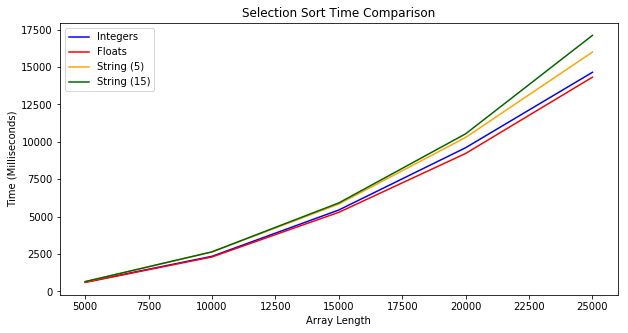

In [88]:
def comparison_plot():
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(pvt_df.array_length, pvt_df.int_l, color="blue")
    ax.plot(pvt_df.array_length, pvt_df.float_l, color="red")
    ax.plot(pvt_df.array_length, pvt_df.str_5_l, color="orange")
    ax.plot(pvt_df.array_length, pvt_df.str_15_l, color="darkgreen")
    ax.set_title("Selection Sort Time Comparison")
    ax.set_ylabel("Time (Milliseconds)")
    ax.set_xlabel("Array Length")
    ax.legend(["Integers", "Floats", "String (5)", "String (15)"])
    plt.show()
    

comparison_plot()

## Executive Summary  
Selection sort is an effective searching algorithm for small to moderately sized lists. It is apparent from our table above, and from the graph, that the type of data being sorted doesn't have a significant impact on the time it takes to sort. This makes sense intuitively because the selection sort maintains a Big O run-time of $O(n^2)$, and this won't changed based on the inputs.  

I've demonstrated how the algorithm can work to sort a list smallest to largest by first finding the smallest value, then writing it to a new list. We then go back to the original list and find the smallest remaining value, and continue on until the full original list has been exhausted. This causes us to traverse our original list $nxn$ times (slightly less as the list decreases each time). This particular run-time becomes quite slow as the list size increases, so it makes sense for data engineers to utilize this technique on smaller data where the performance won't be impeded. A good use case is for sorting artists by their play count on a website. With a small list, the results will return quickly to our users, and won't disturb the user experience.

### Reference  
[1] Bhargava, A. Y. (2016). Grokking algorithms: An illustrated guide for programmers and other curious people.